# <u>Design and develop Recurrent Neural Network (RNN) for prediction of <i>Google Stock Price</i>.</u>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
# Usinmg the Open Stock Price Column only to Train Your Model
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [4]:
training_set.shape

(1258, 1)

### Normalize the Dataset

In [5]:
# Feature Scaling-Normalizing the Dataset
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


### Creating X_train and y_train

In [6]:
#  Creating a data structure with 60 timesteps(days) before current index i
X_train = []
y_train = []

for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)


In [7]:
# Reshaping- add dimension in numpy array because Keras LSTM expects 3D input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
X_train.shape

(1198, 60, 1)

## 2 - Building the RNN

In [15]:
# Initialising the RNN
regressor = Sequential()

#Adding LSTM layers and some dropout regularization to prevent  overfitting
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))  #X_train.shape[1] = 60 . i.e 60 timestamps and 1 feature ( "Open")

#regressor- object of sequential class, can add layers to network. 
#num of units, return sequences- set to true because is stacked lstms, and shape . 
#Units- neurons in first layer- 50 in layers for high dimensionality, can␣ capture upward and downward
regressor.add(Dropout(0.2))   # 20% dropout
regressor.add(LSTM(units=50, return_sequences=True))  #LSTM layer 2
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))  #LSTM layer 3 - return sequence is false because it is the last lstm layer

regressor.add(Dense(units = 1)) # the output fully connected layer ( 1 neuron)


## Comnpile the RNN

In [16]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Train the RNN

In [17]:
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0448
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0028
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0022
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0024
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0023
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0019
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0022
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0019
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0023
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0018
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0017
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0019
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0018
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0018
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0017
Epoc

## 3 - Making Predictions

In [18]:
# Getting the test set
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [19]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [21]:
# preparing input for model
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0) # combine the train and test dataset

# we need 60 days before Jan 2017 to predict the stock prices in Jan 2017.
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values.reshape(-1, 1) #reshaped into 2D with 1 col and possible rows

inputs = sc.transform(inputs)
inputs.shape

(80, 1)

##### Predicting the Stock Prices for Jan 2017

In [23]:


X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) # reshaped the array to 3D for LSTM (samples, timesteps, features)

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


### Vislualizing

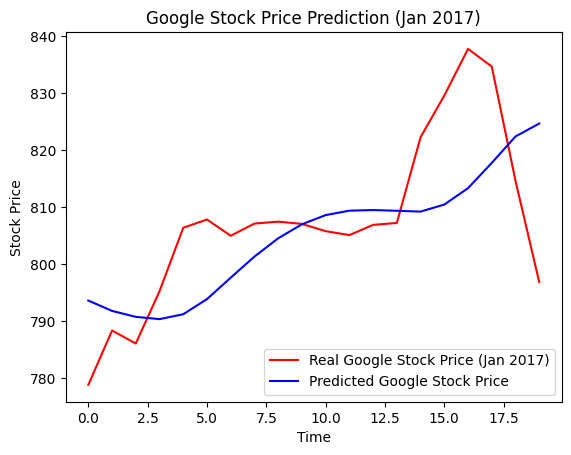

In [26]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price (Jan 2017)')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction (Jan 2017)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='lower right')
plt.show()
